## DATA PREPARATION

In [1]:
import sklearn

import pandas as pd
import numpy as np
from PIL import Image
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
direction_encode = {'right': 0, 'left': 1, 'up': 2, 'straight': 3}
eyewear_encode = {'open': 0, "sunglasses":1}
emotion_encode = {'happy': 0, 'sad': 1, 'angry': 2, 'neutral': 3}

(120, 128)


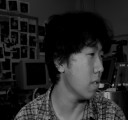

In [3]:
#Opens one of the images 
img= Image.open('TrainingSet/an2i_left_angry_open.jpg')
print(np.asarray(img).shape)
display(img)

In [4]:
#Read training iamges
training_images =list(map(lambda img: os.path.join("TrainingSet/",img ),os.listdir("TrainingSet")))

X_train = []
y_train_direction = []
y_train_emotion = []
y_train_eyewear = []

for img in training_images:
    if img.endswith(".jpg"):
        #Decode labels
        img_name=img.strip(".jpg").split("/")[1].split("_")
        direction = direction_encode[img_name[1]]
        emotion = emotion_encode[img_name[2]]
        eyewear = eyewear_encode[img_name[3]]
        y_train_direction.append(direction)
        y_train_emotion.append(emotion)
        y_train_eyewear.append(eyewear)
        #Flatten the image
        img_flatten = np.asarray(Image.open(img)).flatten()
        X_train.append(img_flatten)

In [5]:
print(X_train[0].shape)
print(len(X_train))
print(len(y_train_direction))
print(len(y_train_emotion))
print(len(y_train_eyewear))

(15360,)
315
315
315
315


In [6]:
#Read test iamges
test_images =list(map(lambda img: os.path.join("TestSet/",img ), os.listdir("TestSet/")))

X_test = []
y_test_direction = []
y_test_emotion = []
y_test_eyewear = []

for img in test_images:
    if img.endswith(".jpg"):
        #Decode labels
        img_name=img.strip(".jpg").split("/")[1].split("_")
        direction = direction_encode[img_name[1]]
        emotion = emotion_encode[img_name[2]]
        eyewear = eyewear_encode[img_name[3]]
        y_test_direction.append(direction)
        y_test_emotion.append(emotion)
        y_test_eyewear.append(eyewear)
        #Flatten the image
        img_flatten = np.asarray(Image.open(img)).flatten()
        X_test.append(img_flatten)

In [7]:
print(X_test[0].shape)
print(len(X_test))
print(len(y_test_direction))
print(len(y_test_emotion))
print(len(y_test_eyewear))

(15360,)
90
90
90
90


In [8]:
# Convert Python lists to Numpy arrays 
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train_direction = np.array(y_train_direction)
y_test_direction = np.array(y_test_direction)

y_train_eyewear = np.array(y_train_eyewear)
y_test_eyewear = np.array(y_test_eyewear)

y_train_emotion = np.array(y_train_emotion)
y_test_emotion = np.array(y_test_emotion)

In [9]:
print(X_train.shape)
print(y_train_direction.shape)
print(y_train_emotion.shape)
print(y_train_eyewear.shape)
print(X_test.shape)
print(y_test_direction.shape)
print(y_test_emotion.shape)
print(y_test_eyewear.shape)

(315, 15360)
(315,)
(315,)
(315,)
(90, 15360)
(90,)
(90,)
(90,)


In [10]:
pd.DataFrame(y_train_direction).value_counts()

0
1    80
2    79
0    78
3    78
Name: count, dtype: int64

In [11]:
pd.DataFrame(y_train_eyewear).value_counts()

0
1    158
0    157
Name: count, dtype: int64

## CLASSIFICATION MODEL TO PREDICT FACE DIRECTION

### part a

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(max_depth=5,random_state=42)
tree_clf.fit(X_train,y_train_direction)


train_predictions = tree_clf.predict(X_train)
train_accuracy = accuracy_score(y_train_direction, train_predictions)

print(train_accuracy)

test_predictions = tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_test_direction,test_predictions)
print(test_accuracy)



0.9555555555555556
0.6555555555555556


In [13]:
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train_direction)
    
    train_acc = accuracy_score(y_train_direction, clf.predict(X_train))
    test_acc = accuracy_score(y_test_direction, clf.predict(X_test))
    
    print(f"max_depth={depth} -> Train: {train_acc:.4f} | Test: {test_acc:.4f}")

max_depth=1 -> Train: 0.4444 | Test: 0.4333
max_depth=2 -> Train: 0.6317 | Test: 0.6667
max_depth=3 -> Train: 0.8063 | Test: 0.7333
max_depth=4 -> Train: 0.8984 | Test: 0.7889
max_depth=5 -> Train: 0.9556 | Test: 0.6556
max_depth=6 -> Train: 0.9937 | Test: 0.7444
max_depth=7 -> Train: 1.0000 | Test: 0.6778
max_depth=8 -> Train: 1.0000 | Test: 0.6778
max_depth=9 -> Train: 1.0000 | Test: 0.6778
max_depth=10 -> Train: 1.0000 | Test: 0.6778
max_depth=11 -> Train: 1.0000 | Test: 0.6778
max_depth=12 -> Train: 1.0000 | Test: 0.6778
max_depth=13 -> Train: 1.0000 | Test: 0.6778
max_depth=14 -> Train: 1.0000 | Test: 0.6778
max_depth=15 -> Train: 1.0000 | Test: 0.6778
max_depth=16 -> Train: 1.0000 | Test: 0.6778
max_depth=17 -> Train: 1.0000 | Test: 0.6778
max_depth=18 -> Train: 1.0000 | Test: 0.6778
max_depth=19 -> Train: 1.0000 | Test: 0.6778
max_depth=20 -> Train: 1.0000 | Test: 0.6778


Best result = Max_depth=4


### part b

In [14]:
#Review https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. Have a close look at attribures section
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svc_clf =SVC()
params = [{'kernel': ['linear','rbf', 'poly'], 'C': [0.1, 0.5, 1.0], "tol": [0.0001,0.001]}]

grid_search = GridSearchCV(svc_clf,params,cv=5)
grid_search.fit(X_train,y_train_direction)

best_model=grid_search.best_estimator_
best_parameters=grid_search.best_params_

train_predictions=best_model.predict(X_train)
train_accuracy=accuracy_score(y_train_direction,train_predictions)
validation_accuracy = grid_search.best_score_

print(best_model)
print(best_parameters)
print(train_accuracy)
print(validation_accuracy)

test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test_direction,test_predictions)

print(test_accuracy)


SVC(kernel='poly', tol=0.0001)
{'C': 1.0, 'kernel': 'poly', 'tol': 0.0001}
1.0
0.8158730158730159
0.9777777777777777


Did your model perform well on both training and test data?


The model performed well on both training and test data. Although it achieved 100% training accuracy (indicating potential overfitting), the test accuracy was very high (~97.8%) and even better than the validation accuracy (~81.6%), suggesting that the model generalized well to unseen data.

### part c

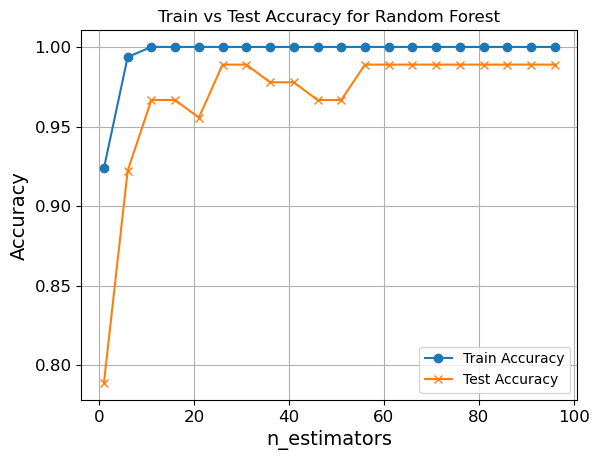

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
n_estimators_list=range(1,101,5)

train_accuracies=[]
test_accuracies=[]
for n_estimators in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators,random_state=42)
    rf_clf.fit(X_train,y_train_direction)
    
    train_predictions=rf_clf.predict(X_train)
    train_accuracy=accuracy_score(y_train_direction,train_predictions)
    train_accuracies.append(train_accuracy)
    
    test_predictions=rf_clf.predict(X_test)
    test_accuracy=accuracy_score(y_test_direction,test_predictions)
    test_accuracies.append(test_accuracy)

plt.plot(n_estimators_list,train_accuracies,label='Train Accuracy',marker='o')
plt.plot(n_estimators_list,test_accuracies,label='Test Accuracy',marker='x')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Test Accuracy for Random Forest')
plt.grid(True)
plt.show()

#plot train and test accuracy for n_estimators values of 1 to 100 (step size is your choice)



### part d

Experiment with different models and parameters to see if you can increase test accuracy.  Report the model with highest accuracy you achived.

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_eyewear)


train_predictions = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train_eyewear, train_predictions)


test_predictions = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test_eyewear, test_predictions)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 1.0
Test Accuracy: 0.7777777777777778


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=5)  
knn_clf.fit(X_train, y_train_eyewear)


train_predictions = knn_clf.predict(X_train)
train_accuracy = accuracy_score(y_train_eyewear, train_predictions)


test_predictions = knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test_eyewear, test_predictions)

print("KNN Classifier")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("-" * 30)


KNN Classifier
Train Accuracy: 0.9333333333333333
Test Accuracy: 0.6444444444444445
------------------------------


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(
    n_estimators=200,  
    max_depth=10,      
    min_samples_split=5,
    random_state=42
)
rf_clf.fit(X_train, y_train_eyewear)


train_predictions = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train_eyewear, train_predictions)


test_predictions = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test_eyewear, test_predictions)

print("Random Forest Classifier")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("-" * 30)


Random Forest Classifier
Train Accuracy: 1.0
Test Accuracy: 0.7
------------------------------


KNN model showed the best performance of these three by %77.8 accuracy. Logistic Regression- %70 accuracy, Random Forest-%64.4. 

Trying to improve KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []
k_values = list(range(1, 21))

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train_eyewear)

    train_predictions = knn_clf.predict(X_train)
    test_predictions = knn_clf.predict(X_test)

    train_accuracy = accuracy_score(y_train_eyewear, train_predictions)
    test_accuracy = accuracy_score(y_test_eyewear, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


best_test_accuracy = max(test_accuracies)
best_k = k_values[test_accuracies.index(best_test_accuracy)]

print(f"Best k: {best_k}")
print(f"Best Test Accuracy: {best_test_accuracy}")

Best k: 1
Best Test Accuracy: 0.7


## CLASSIFICATION MODEL TO PREDICT EYEWEAR 

### part e



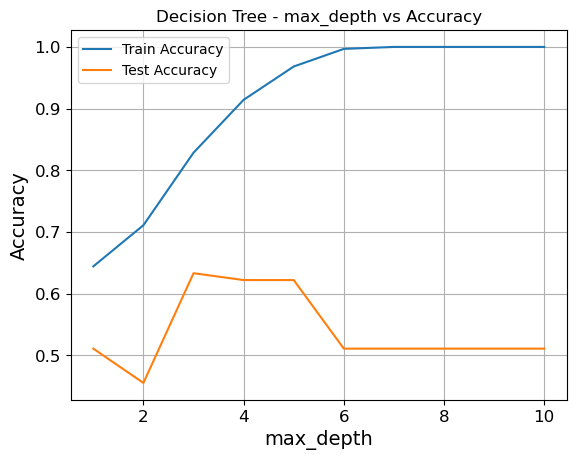

Best max_depth = 3 (Test Accuracy = 0.6333)


In [20]:

from sklearn.tree import DecisionTreeClassifier


train_accuracies = []
test_accuracies = []


depth_vals = range(1, 11)

for depth in depth_vals:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train_eyewear)

    train_accuracy = accuracy_score(y_train_eyewear, tree_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test_eyewear, tree_clf.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.plot(depth_vals, train_accuracies, label='Train Accuracy')
plt.plot(depth_vals, test_accuracies, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree - max_depth vs Accuracy')
plt.grid(True)
plt.show()


best_accuracy = max(test_accuracies)
best_depth = depth_vals[test_accuracies.index(best_accuracy)]

print(f"Best max_depth = {best_depth} (Test Accuracy = {best_accuracy:.4f})")

### part f

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(solver='saga', max_iter=1000, tol=0.001, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train_eyewear)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
train_accuracy = grid_search.best_score_

print("Best Logistic Regression Model:")
print(best_model)
print("Best Parameters:")
print(best_params)
print("Training (CV) Accuracy:")
print(train_accuracy)

test_accuracy = accuracy_score(y_test_eyewear, best_model.predict(X_test))
print("Test Accuracy:")
print(test_accuracy)



Best Logistic Regression Model:
LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga', tol=0.001)
Best Parameters:
{'C': 0.1, 'penalty': 'l1'}
Training (CV) Accuracy:
0.6825396825396824
Test Accuracy:
0.6888888888888889


### part g


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=42)

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'], 
    'C': [0.1, 0.5, 1.0],
    'tol': [0.0001, 0.001]
}

grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train_eyewear)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
train_accuracy = grid_search.best_score_

print("Best SVC Model:")
print(best_model)
print("Best Parameters:")
print(best_params)
print("Training (CV) Accuracy:")
print(train_accuracy)

test_accuracy = accuracy_score(y_test_eyewear, best_model.predict(X_test))
print("Test Accuracy:")
print(test_accuracy)




Best SVC Model:
SVC(C=0.1, kernel='poly', random_state=42, tol=0.0001)
Best Parameters:
{'C': 0.1, 'kernel': 'poly', 'tol': 0.0001}
Training (CV) Accuracy:
0.7174603174603175
Test Accuracy:
0.8


### part h

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train_eyewear)

train_preds = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train_eyewear, train_preds)

test_preds = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test_eyewear, test_preds)


print("Random Forest Classifier (Eyewear)")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)




Random Forest Classifier (Eyewear)
Train Accuracy: 1.0
Test Accuracy: 0.6333333333333333


### part i

Experiment with different models and parameters to see if you can increase test accuracy.  Report the model with highest accuracy you achived.

In [26]:
#KNN with different parameters

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, params, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train_eyewear)

print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Train Score:", grid_search.best_score_)


test_preds = grid_search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test_eyewear, test_preds))


Best Estimator: KNeighborsClassifier(metric='euclidean', weights='distance')
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Train Score: 0.6571428571428571
Test Accuracy: 0.6444444444444445


In [28]:
#Random Forest with different max_depth

In [29]:
for depth in [5, 10, 15]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train_eyewear)
    acc = accuracy_score(y_test_eyewear, rf.predict(X_test))
    print(f"max_depth={depth} => Test Accuracy: {acc:.4f}")


max_depth=5 => Test Accuracy: 0.6333
max_depth=10 => Test Accuracy: 0.7111
max_depth=15 => Test Accuracy: 0.7222


In [30]:
#Trying Gradient Boost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gbc.fit(X_train, y_train_eyewear)

train_acc = accuracy_score(y_train_eyewear, gbc.predict(X_train))
test_acc = accuracy_score(y_test_eyewear, gbc.predict(X_test))

print("Gradient Boosting - Train:", train_acc)
print("Gradient Boosting - Test:", test_acc)


Gradient Boosting - Train: 1.0
Gradient Boosting - Test: 0.6222222222222222


In [32]:
#PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train_eyewear)
print("Test Accuracy with PCA:", accuracy_score(y_test_eyewear, knn.predict(X_test_pca)))


Test Accuracy with PCA: 0.6333333333333333


D:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
